<a href="https://colab.research.google.com/github/lalitrajput11/Dats-Science/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/placement.csv")

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.shape

(100, 4)

# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model
     

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   placement  0 non-null      int64
dtypes: int64(1)
memory usage: 124.0 bytes


In [15]:
df = df.iloc[:,1:]
df.head()

,placement


In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

KeyError: 'cgpa'

In [17]:
df = pd.read_csv('/content/placement.csv')

In [18]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [19]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


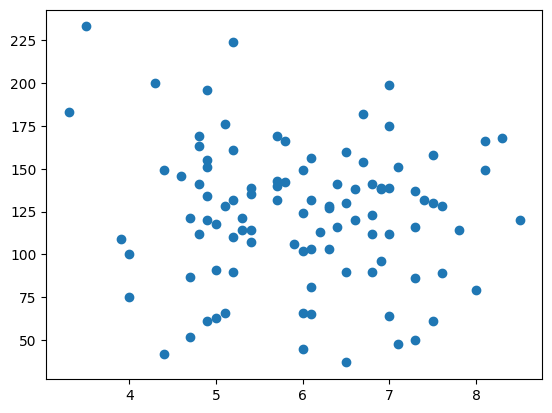

In [20]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

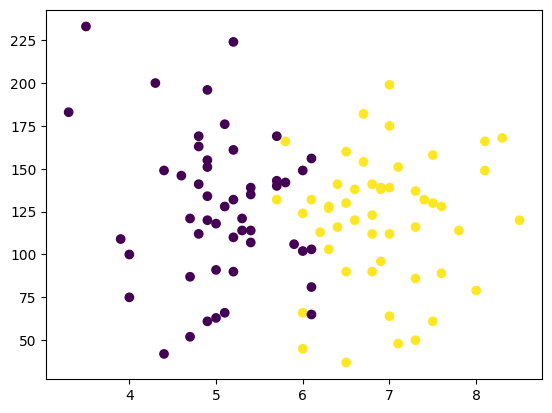

In [21]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

Classification : Logistic Regression.
A part of machine learning model. Algo will check the seperation line, and try to see lineraity so for future result , it can decide the data

Extract input and output cols

In [22]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [23]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


above is : 100 rows × 2 columns , 2D tensor

In [25]:
y
y.shape

(100,)

Scale the values

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [28]:
x_train

,cgpa,iq
66,6.9,96.0
41,5.4,114.0
6,5.7,143.0
92,5.2,110.0
18,4.0,100.0
...,...,...
98,6.3,103.0
25,5.0,91.0
32,7.0,139.0
99,6.2,113.0


In [30]:
y_train

66    1
41    0
6     0
92    0
18    0
     ..
98    1
25    0
32    1
99    1
47    0
Name: placement, Length: 90, dtype: int64

Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
x_train = scaler.fit_transform(x_train)

In [33]:
x_train

array([[ 0.80382114, -0.68257678],
       [-0.51954293, -0.22241266],
       [-0.25487012,  0.51896287],
       [-0.69599147, -0.32467135],
       [-1.75468272, -0.58031809],
       [-0.69599147,  2.58970142],
       [ 1.42139103,  0.13549277],
       [ 0.27447551,  0.1099281 ],
       [ 0.09802697, -0.50362407],
       [ 1.86251239,  0.67235091],
       [-0.16664585,  1.10695036],
       [-0.78421574,  1.3625971 ],
       [-0.78421574, -1.44951699],
       [ 0.09802697, -1.06604688],
       [-1.75468272, -1.21943492],
       [-0.69599147, -0.83596482],
       [-0.51954293,  0.41670418],
       [ 1.33316676,  0.90243297],
       [ 0.89204541, -1.50064633],
       [-0.87244001, -0.12015397],
       [ 1.15671822,  0.36557483],
       [ 0.62737259,  0.80017428],
       [-1.04888856,  0.46783352],
       [-0.25487012,  1.18364438],
       [-0.6077672 , -0.04345994],
       [ 0.0098027 ,  0.03323408],
       [-1.40178564,  0.67235091],
       [-0.25487012,  0.23775146],
       [ 0.89204541,

In [34]:
x_test = scaler.transform(x_test)

In [35]:
x_test

array([[-1.2253371 ,  0.59565689],
       [-0.96066428, -1.57734035],
       [-0.87244001, -1.52621101],
       [ 0.53914832,  0.3911395 ],
       [-0.96066428,  1.87389057],
       [ 1.15671822, -0.93822352],
       [ 2.03896093,  1.15807971],
       [-0.16664585,  0.4933982 ],
       [ 0.89204541,  1.33703242],
       [-0.25487012,  0.44226885]])

Above Train the split
Train the model by logistic

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [37]:
clf.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred = clf.predict(x_test)

In [50]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [39]:
  y_test

39    0
73    0
7     0
48    1
80    0
90    1
53    1
4     0
52    1
36    0
Name: placement, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score


In [51]:
accuracy_score(y_test,y_pred)

1.0

In [52]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

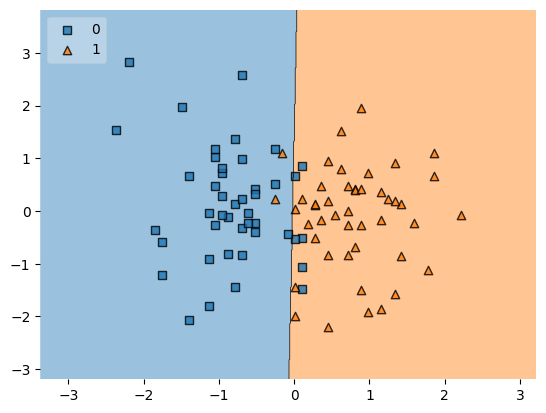

In [54]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend = 2)

In [55]:
import pickle

pickle is used for deplyment , it extract model in file

In [56]:
pickle.dump(clf,open('model.pkl','wb'))